# Задание №4: SVM и KNN

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import datasets

## Загрузка данных

In [14]:
data_to_numpy = np.genfromtxt('custom_dataset.csv',delimiter=',')

size_1, size_2 = np.shape(data_to_numpy)
clear_data = np.zeros((size_1 - 1, size_2 - 1))
clear_data[:, :]  = data_to_numpy[1:, 1:]
clear_data

# X - наши точки, Y - массив класс для каждой точки из X
X, Y = np.zeros((size_1 - 1, 2)), np.zeros(size_1 - 1)

X[:, :] = clear_data[:, :2]
Y[:] = clear_data[:, 2]


## Отобразим наши данные на плоскости

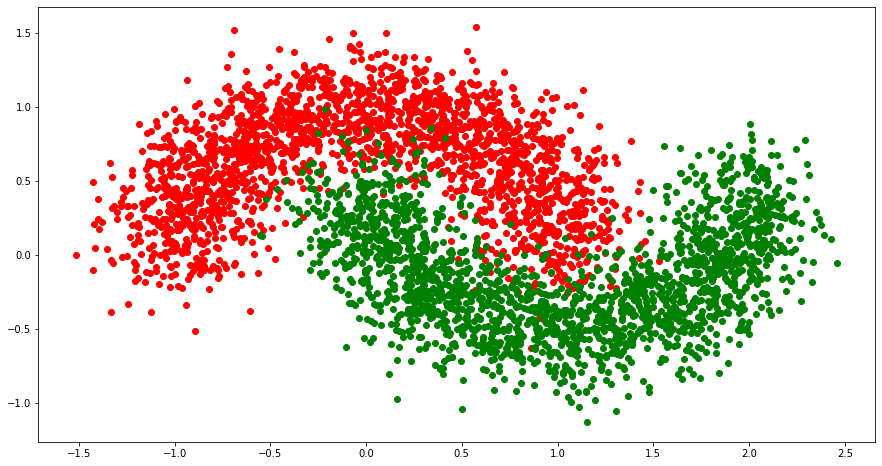

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
colors = {0:'red', 1:'green'}

for key, value in colors.items(): 
    
    ax.scatter(X[Y==key, 0],X[Y==key, 1], c=value, label=key)
plt.axis('tight')

plt.show()


## SVM 
## Сначала на всех данных смотрим. 
## Преобразуем фичи под полином 3 степени

In [4]:
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures


X_polynom = PolynomialFeatures(degree=3).fit_transform(X)
model_svm = SVC(kernel='linear')
model_svm.fit(X_polynom, Y)

SVC(kernel='linear')

<ipython-input-5-af26581a9609>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


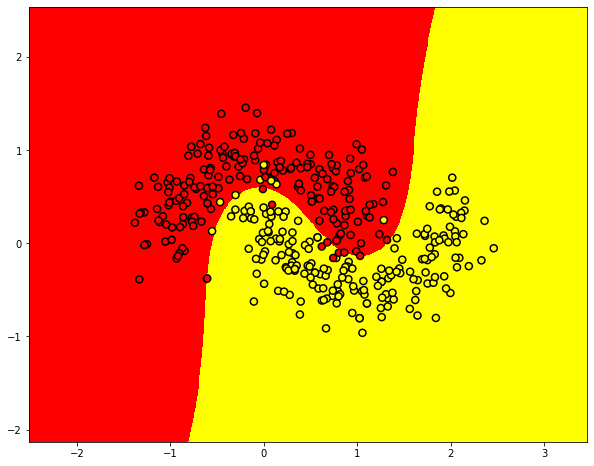

In [5]:
x_min, x_max = X_polynom[:, 1].min() - 1, X_polynom[:, 1].max() + 1
y_min, y_max = X_polynom[:, 2].min() - 1, X_polynom[:, 2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xxyy = np.array([xx.ravel(), yy.ravel()]).transpose()
xxr = PolynomialFeatures(degree=3).fit_transform(xxyy)


predicted = model_svm.predict(np.c_[xxr]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 400)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X_polynom[random_indxs, 1], X_polynom[random_indxs, 2], 
            c=Y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)

## Найдем ширину разделяющей полосы

In [6]:
margin = 1 / np.sqrt(np.sum(model_svm.coef_ ** 2))
print("Ширина разделающей полосы = ", 2 * margin)

Ширина разделающей полосы =  0.191178488219388


## Найдем точность SVM предварительно разбив данные на тестовую и тренировочную

In [6]:
from sklearn.model_selection import train_test_split

# установим random_state, чтобы результаты эксперимента были воспроизводимы
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

X_train_polynom = PolynomialFeatures(degree=3).fit_transform(X_train)
model_svm.fit(X_train_polynom, y_train)
X_test_polynom = PolynomialFeatures(degree=3).fit_transform(X_test)
predict = model_svm.predict(np.c_[X_test_polynom])

accuracy = np.sum(y_test == predict) / len(y_test)
print("Точность SVM: ", accuracy)

Точность SVM:  0.9652366863905325


## Теперь преобразуем фичи под полином 5 степени и посмотрим, какие значение примут ширина разделяющей полосы и точность

In [7]:
X_polynom = PolynomialFeatures(degree=5).fit_transform(X)
model_svm = SVC(kernel='linear')
model_svm.fit(X_polynom, Y)

SVC(kernel='linear')

<ipython-input-8-d91b20edab95>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


Ширина разделающей полосы =  0.23855084827764494
Точность SVM:  0.9652366863905325


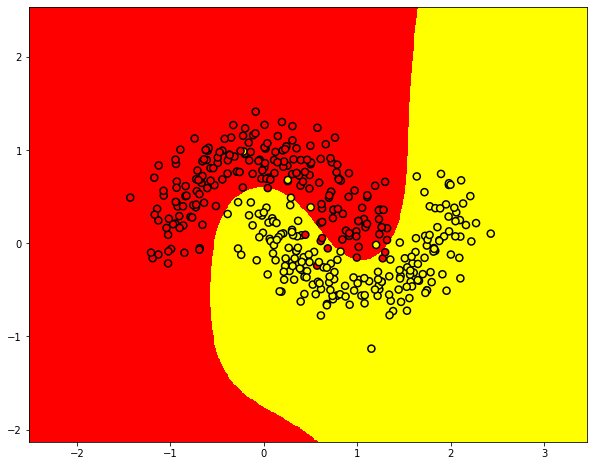

In [8]:
x_min, x_max = X_polynom[:, 1].min() - 1, X_polynom[:, 1].max() + 1
y_min, y_max = X_polynom[:, 2].min() - 1, X_polynom[:, 2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xxyy = np.array([xx.ravel(), yy.ravel()]).transpose()
xxr = PolynomialFeatures(degree=5).fit_transform(xxyy)


predicted = model_svm.predict(np.c_[xxr]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 400)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X_polynom[random_indxs, 1], X_polynom[random_indxs, 2], 
            c=Y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)

# Находим ширину разделяющую полосу
margin = 1 / np.sqrt(np.sum(model_svm.coef_ ** 2))
print("Ширина разделающей полосы = ", 2 * margin)

# найдем ошибку SVM
from sklearn.model_selection import train_test_split

# установим random_state, чтобы результаты эксперимента были воспроизводимы
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

X_train_polynom = PolynomialFeatures(degree=5).fit_transform(X_train)
model_svm.fit(X_train_polynom, y_train)
X_test_polynom = PolynomialFeatures(degree=5).fit_transform(X_test)
predict = model_svm.predict(np.c_[X_test_polynom])

accuracy = np.sum(y_test == predict) / len(y_test)
print("Точность SVM: ", accuracy)

## Аналогично дейcтвуем с KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures

X_polynom = PolynomialFeatures(degree=3).fit_transform(X)
model_knn = KNeighborsClassifier()
model_knn.fit(X_polynom, Y)

KNeighborsClassifier()

<ipython-input-10-ce6843474a37>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


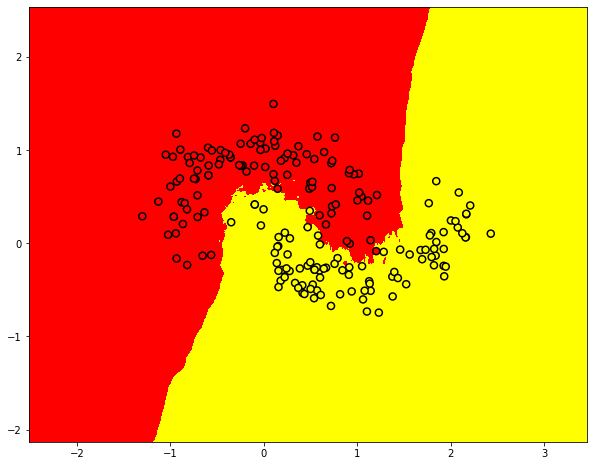

In [10]:
x_min, x_max = X_polynom[:, 1].min() - 1, X_polynom[:, 1].max() + 1
y_min, y_max = X_polynom[:, 2].min() - 1, X_polynom[:, 2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xxyy = np.array([xx.ravel(), yy.ravel()]).transpose()
xxr = PolynomialFeatures(degree=3).fit_transform(xxyy)

predicted = model_knn.predict(np.c_[xxr]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X_polynom[random_indxs, 1], X_polynom[random_indxs, 2], 
            c=Y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)

## Также находим точность KNN предварительно разбив данные на тестовую и тренировочную

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

X_train_polynom = PolynomialFeatures(degree=3).fit_transform(X_train)
model_knn.fit(X_train_polynom, y_train)
X_test_polynom = PolynomialFeatures(degree=3).fit_transform(X_test)
predict = model_knn.predict(np.c_[X_test_polynom])

In [12]:
accuracy = np.sum(y_test == predict) / len(y_test)
print("Точность KNN: ", accuracy)

Точность KNN:  0.9674556213017751
